# Spherical Gaussian experiment: inference results

## Setup

In [2]:
import sys
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import torch
from torch.utils.data import TensorDataset
import logging

sys.path.append("../../")

%matplotlib inline

logging.basicConfig(
    format="%(asctime)-5.5s %(name)-30.30s %(levelname)-7.7s %(message)s",
    datefmt="%H:%M",
    level=logging.DEBUG,
)
logger = logging.getLogger(__name__)
# Output of all other modules (e.g. matplotlib)
for key in logging.Logger.manager.loggerDict:
    if "manifold_flow" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)


## Load results

In [3]:
algo_filenames = [
    "flow", "flow", "flow", "flow", 
    "pie", "pie", "pie", "pie", 
    "mf", "slice",
    "gamf", "gamf", "gamf", "gamf", "gamf",
    "hybrid",
    "mf_specified", "pie_specified"
]
algo_additionals = [
    "", "_long", "_long_shallow", "_long_deep",
    "", "_long", "_long_shallow", "_long_deep",
    "",
    "", 
    "", "_long_simple", "_long", "_long_shallow", "_long_deep",
    "", 
    "", ""
]
algo_labels = [
    "Flow (short)", "Flow (long)", "Flow (long, shallow)", "Flow (long, deep)",
    "PIE (short)", "PIE (long)", "PIE (long, shallow)", "PIE (long, deep)",
    "Manifold flow (short, simple)",
    "Slice (short, simple)",
    "GAMF (short, simple)", "GAMF (long, simple)", "GAMF (long)", "GAMF (long, shallow)", "GAMF (long, deep)",
    "Hybrid (short, simple)",
    "Specified MF (short)", "Specified PIE (short)"
]

setup_filenames = [
    "2_3_0.010",
    "2_3_0.001",
    "2_3_0.100",
]


In [4]:
result_dir = "../data/results"

true_posterior_samples = []
model_posterior_samples = []
mmds = []

for algo_filename in algo_filenames:
    true_posterior_samples_ = []
    model_posterior_samples_ = []
    mmds_ = []
    for setup_filename in setup_filenames:
        try:
            true_posterior_samples_.append(np.load(
                "{}/{}_2_conditional_spherical_gaussian_{}_true_posterior_samples.npy".format(
                    result_dir, algo_filename, setup_filename
                )
            ))
        except FileNotFoundError as e:
            print(e)
            true_posterior_samples_.append(np.nan*np.ones((1000,2)))
            
        try:
            model_posterior_samples_.append(np.load(
                "{}/{}_2_conditional_spherical_gaussian_{}_model_posterior_samples.npy".format(
                    result_dir, algo_filename, setup_filename
                )
            ))
        except FileNotFoundError as e:
            print(e)
            model_posterior_samples_.append(np.nan*np.ones((1000,2)))
            
        try:
            mmds_.append(np.load(
                "{}/{}_2_conditional_spherical_gaussian_{}_mmd.npy".format(
                    result_dir, algo_filename, setup_filename
                )
            ))
        except:
            mmds_.append(np.nan*np.ones((1,)))
            
    true_posterior_samples.append(true_posterior_samples_)
    model_posterior_samples.append(model_posterior_samples_)
    mmds.append(mmds_)
    
true_posterior_samples = np.asarray(true_posterior_samples)
model_posterior_samples = np.asarray(model_posterior_samples)
mmds = np.asarray(mmds)


[Errno 2] No such file or directory: '../data/results/slice_2_conditional_spherical_gaussian_2_3_0.010_true_posterior_samples.npy'
[Errno 2] No such file or directory: '../data/results/slice_2_conditional_spherical_gaussian_2_3_0.010_model_posterior_samples.npy'
[Errno 2] No such file or directory: '../data/results/slice_2_conditional_spherical_gaussian_2_3_0.001_true_posterior_samples.npy'
[Errno 2] No such file or directory: '../data/results/slice_2_conditional_spherical_gaussian_2_3_0.001_model_posterior_samples.npy'
[Errno 2] No such file or directory: '../data/results/slice_2_conditional_spherical_gaussian_2_3_0.100_true_posterior_samples.npy'
[Errno 2] No such file or directory: '../data/results/slice_2_conditional_spherical_gaussian_2_3_0.100_model_posterior_samples.npy'
[Errno 2] No such file or directory: '../data/results/mf_specified_2_conditional_spherical_gaussian_2_3_0.010_true_posterior_samples.npy'
[Errno 2] No such file or directory: '../data/results/mf_specified_2_cond

## Plot results

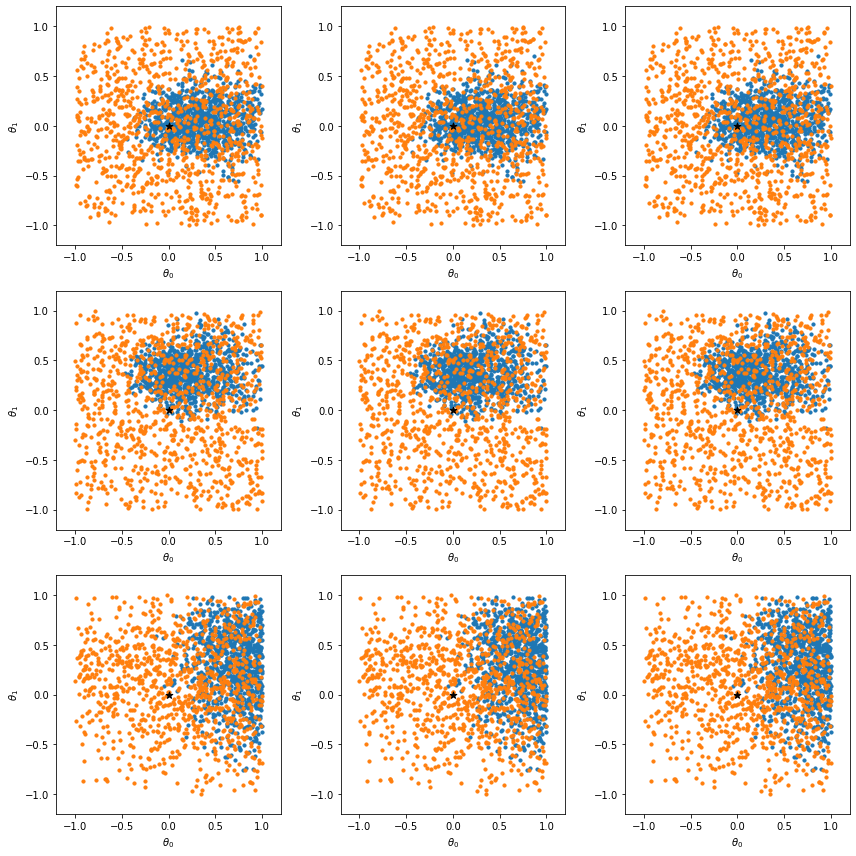

In [5]:
show = [1,0,2]
ncols = 3
nrows = len(show)

fig = plt.figure(figsize=(ncols*4, nrows*4))

for row, setting in enumerate(show):
    for col, algo in enumerate(range(3)):
        ax = plt.subplot(nrows, ncols, setting*ncols + algo + 1)

        plt.scatter(true_posterior_samples[algo, setting,:,0], true_posterior_samples[algo, setting,:,1], s=10., c="C0")
        plt.scatter(model_posterior_samples[algo, setting,:,0], model_posterior_samples[algo, setting,:,1], s=10., c="C1")
        plt.scatter([0.], [0.], s=50, marker="*", c="black")

        plt.xlabel(r"$\theta_0$")
        plt.ylabel(r"$\theta_1$")
        plt.xlim(-1.2,1.2)
        plt.ylim(-1.2,1.2)
    
plt.tight_layout()
plt.savefig("../figures/posterior_samples_csg.pdf")


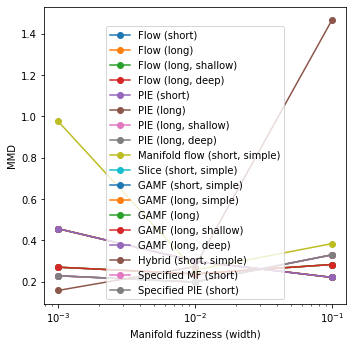

In [6]:
show = [1, 0, 2]
xs = [0.001, 0.01, 0.1]

fig = plt.figure(figsize=(5,5))

for mmds_, algo_label in zip(mmds, algo_labels):
    plt.plot(xs, mmds_[show], label=algo_label, ls="-", marker="o", ms=6.)
plt.legend()
plt.xscale("log")
plt.xlabel("Manifold fuzziness (width)")
plt.ylabel("MMD")

plt.tight_layout()
plt.savefig("../figures/mmd_vs_epsilon_csg.pdf")

